# Basic imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from joblib import dump, load
import master_functions as mf

In [2]:
from matplotlib import rcParams
rcParams['figure.dpi'] = 600

In [3]:
df_all = pd.read_pickle('main_df.pkl')
df_all_small = pd.read_csv('test/dfs&results/df_all_small.tsv', sep='\t')
learning_df = pd.read_csv('test/dfs&results/learning_df.tsv', sep='\t')
# results = load('test/results.joblib')
results_small = load('test/dfs&results/results_small.joblib')

In [4]:
df_all.head()

,virus,host,blastn,crisprdetect-2mismatch,gc_content,k25,k6-chebyshev,k6-kendalltau,k6-manhattan,piler-2mismatch,wish,group,group_code,y
0,NC_010363,NC_008527,60.8,0.0,0.021973,0.0,0.002122,0.398421,0.382144,0.0,-1.33553,Streptococcaceae,41,1
1,NC_010363,NC_002662,59.0,0.0,0.016709,0.0,0.001929,0.397773,0.377498,0.0,-1.33035,Streptococcaceae,41,1
2,NC_010363,NC_017949,59.0,0.0,0.020818,0.0,0.002088,0.396969,0.379686,0.0,-1.33341,Streptococcaceae,41,1
3,NC_010363,NC_017492,59.0,0.0,0.022209,0.0,0.002131,0.396148,0.380930,0.0,-1.33767,Streptococcaceae,41,1
4,NC_010363,NC_009004,59.0,0.0,0.020871,0.0,0.002088,0.397095,0.379834,0.0,-1.33341,Streptococcaceae,41,1


In [4]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.model_selection import cross_validate

logo = LeaveOneGroupOut()
X_main = df_all_small.drop(['virus', 'host', 'group', 'group_code', 'y', '0', '1'], axis=1)
y_main = df_all_small['y']
groups_main = df_all_small['group_code'].values

# Creation of dfs

## Random Forest

In [6]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

# get X and y
X_learning = learning_df.drop(['virus', 'host', 'group', 'group_code', 'y'], axis=1)
y_learning = learning_df['y']
groups = learning_df['group_code'].to_numpy()

# train the model
# determine the scoring method
scoring = ['f1']
# create logo cv procedure
logo = LeaveOneGroupOut()
# create model
rfc = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', 
                            max_depth=4, random_state=1)
# evaluate model
results_rfc = cross_validate(rfc, X_learning, y_learning, scoring=scoring, 
                        cv=logo, groups=groups, n_jobs=-1, return_estimator=True)

In [44]:
dump(results_rfc, 'test/dfs&results/results_rfc.joblib')

['test/dfs&results/results_rfc.joblib']

In [32]:
# get the probabilities
X_sel_main = df_all_small.drop(['virus', 'host', 'group', 'group_code', 'y', '0', '1'], axis=1)
prob_df_sel = pd.DataFrame(index=range(len(df_all_small['y'])), columns=['0', '1'])
prob_df_sel['0'] = prob_df_sel['0'].astype('float')
prob_df_sel['1'] = prob_df_sel['1'].astype('float')
for i in range(0, max(groups_main)+1):
    mask_main = groups_main == i
    prob_df_sel.loc[mask_main, ['0', '1']] = \
        results_rfc['estimator'][i].predict_proba(X_sel_main.loc[mask_main,:])


In [34]:
df_all_small.iloc[:,:-3] 

,virus,host,blastn,crisprdetect-2mismatch,gc_content,k25,k6-chebyshev,k6-kendalltau,k6-manhattan,piler-2mismatch,wish,group,group_code
0,NC_010363,NC_008527,60.8,0.0,0.021973,0.0,0.002122,0.398421,0.382144,0.0,-1.33553,Streptococcaceae,41
1,NC_010363,NC_002662,59.0,0.0,0.016709,0.0,0.001929,0.397773,0.377498,0.0,-1.33035,Streptococcaceae,41
2,NC_010363,NC_017949,59.0,0.0,0.020818,0.0,0.002088,0.396969,0.379686,0.0,-1.33341,Streptococcaceae,41
3,NC_010363,NC_017492,59.0,0.0,0.022209,0.0,0.002131,0.396148,0.380930,0.0,-1.33767,Streptococcaceae,41
4,NC_010363,NC_009004,59.0,0.0,0.020871,0.0,0.002088,0.397095,0.379834,0.0,-1.33341,Streptococcaceae,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2213175,NC_024392,NC_009664,0.0,0.0,0.380006,0.0,0.006918,1.525475,1.535981,0.0,-1.46593,Listeriaceae,22
2213176,NC_024392,NC_011891,0.0,0.0,0.382821,0.0,0.010627,1.509128,1.523096,0.0,-1.47323,Listeriaceae,22
2213177,NC_024392,NC_015514,0.0,0.0,0.382899,0.0,0.007646,1.544129,1.575653,0.0,-1.45837,Listeriaceae,22
2213178,NC_024392,NC_011145,0.0,0.0,0.384063,0.0,0.010793,1.507242,1.526537,0.0,-1.47286,Listeriaceae,22


In [38]:
df_rfc = pd.concat([df_all_small.iloc[:,:-2], prob_df_sel], axis=1) 

In [37]:
df_all_small.head()

,virus,host,blastn,crisprdetect-2mismatch,gc_content,k25,k6-chebyshev,k6-kendalltau,k6-manhattan,piler-2mismatch,wish,group,group_code,y,0,1
0,NC_010363,NC_008527,60.8,0.0,0.021973,0.0,0.002122,0.398421,0.382144,0.0,-1.33553,Streptococcaceae,41,1,0.870,0.130
1,NC_010363,NC_002662,59.0,0.0,0.016709,0.0,0.001929,0.397773,0.377498,0.0,-1.33035,Streptococcaceae,41,1,0.730,0.270
2,NC_010363,NC_017949,59.0,0.0,0.020818,0.0,0.002088,0.396969,0.379686,0.0,-1.33341,Streptococcaceae,41,1,0.805,0.195
3,NC_010363,NC_017492,59.0,0.0,0.022209,0.0,0.002131,0.396148,0.380930,0.0,-1.33767,Streptococcaceae,41,1,0.875,0.125
4,NC_010363,NC_009004,59.0,0.0,0.020871,0.0,0.002088,0.397095,0.379834,0.0,-1.33341,Streptococcaceae,41,1,0.800,0.200


In [39]:
df_rfc.head()

,virus,host,blastn,crisprdetect-2mismatch,gc_content,k25,k6-chebyshev,k6-kendalltau,k6-manhattan,piler-2mismatch,wish,group,group_code,y,0,1
0,NC_010363,NC_008527,60.8,0.0,0.021973,0.0,0.002122,0.398421,0.382144,0.0,-1.33553,Streptococcaceae,41,1,0.342766,0.657234
1,NC_010363,NC_002662,59.0,0.0,0.016709,0.0,0.001929,0.397773,0.377498,0.0,-1.33035,Streptococcaceae,41,1,0.338572,0.661428
2,NC_010363,NC_017949,59.0,0.0,0.020818,0.0,0.002088,0.396969,0.379686,0.0,-1.33341,Streptococcaceae,41,1,0.342070,0.657930
3,NC_010363,NC_017492,59.0,0.0,0.022209,0.0,0.002131,0.396148,0.380930,0.0,-1.33767,Streptococcaceae,41,1,0.347298,0.652702
4,NC_010363,NC_009004,59.0,0.0,0.020871,0.0,0.002088,0.397095,0.379834,0.0,-1.33341,Streptococcaceae,41,1,0.342070,0.657930


In [41]:
df_rfc.to_csv('test/dfs&results/df_all_rfc.tsv', sep='\t')

## Logistic Regression

In [42]:
df_lrc = pd.read_csv('test/dfs&results/df_all_lrc.tsv', sep='\t')

In [43]:
df_lrc.head()

,Unnamed: 0,virus,host,blastn,crisprdetect-2mismatch,gc_content,k25,k6-chebyshev,k6-kendalltau,k6-manhattan,piler-2mismatch,wish,group,group_code,y,0,1
0,0,NC_010363,NC_008527,60.8,0.0,0.021973,0.0,0.002122,0.398421,0.382144,0.0,-1.33553,Streptococcaceae,41,1,0.453301,0.546699
1,1,NC_010363,NC_002662,59.0,0.0,0.016709,0.0,0.001929,0.397773,0.377498,0.0,-1.33035,Streptococcaceae,41,1,0.458118,0.541882
2,2,NC_010363,NC_017949,59.0,0.0,0.020818,0.0,0.002088,0.396969,0.379686,0.0,-1.33341,Streptococcaceae,41,1,0.458727,0.541273
3,3,NC_010363,NC_017492,59.0,0.0,0.022209,0.0,0.002131,0.396148,0.380930,0.0,-1.33767,Streptococcaceae,41,1,0.459066,0.540934
4,4,NC_010363,NC_009004,59.0,0.0,0.020871,0.0,0.002088,0.397095,0.379834,0.0,-1.33341,Streptococcaceae,41,1,0.458766,0.541234


## LinearSVC

In [5]:
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_validate

# get X and y
X_learning = learning_df.drop(['virus', 'host', 'group', 'group_code', 'y'], axis=1)
y_learning = learning_df['y']
groups = learning_df['group_code'].to_numpy()


In [61]:
logo = LeaveOneGroupOut()
pipe = Pipeline([
    ('normalize', Normalizer()),
    ('svc', LinearSVC(C=0.01, class_weight={0:1, 1:1.5})),
])

# evaluate model
results_svc = cross_validate(pipe, X_learning.values, y_learning, scoring='f1', 
                        cv=logo, groups=groups, n_jobs=-1, return_estimator=True)


In [6]:
results_svc = load('test/dfs&results/results_linsvc.joblib')

In [62]:
# get the probabilities
X_sel_main = df_all_small[X_learning.columns]
prob_series_svc = pd.DataFrame(index=range(len(df_all_small['y'])), columns=['prob'])
prob_series_svc['prob'] = prob_series_svc['prob'].astype('float')
for i in range(0, max(groups_main)+1):
    mask_main = groups_main == i
    X_curr = Normalizer().fit_transform(X_sel_main.loc[mask_main,:])
    prob_series_svc.loc[mask_main, ['prob']] = \
        results_svc['estimator'][i].decision_function(X_curr).reshape(len(X_curr), 1)

In [11]:
prob_series_svc

,prob
0,0.691382
1,0.691718
2,0.691481
3,0.691399
4,0.691474
...,...
2213175,-1.121109
2213176,-1.120615
2213177,-1.143411
2213178,-1.125196


In [17]:
df_prob_svc = pd.concat([df_all_small['y'], prob_series_svc], axis=1)

In [21]:
df_prob_svc = df_prob_svc.rename(columns={'prob': '1'})

In [22]:
df_prob_svc.head()

,y,1
0,1,0.691382
1,1,0.691718
2,1,0.691481
3,1,0.691399
4,1,0.691474


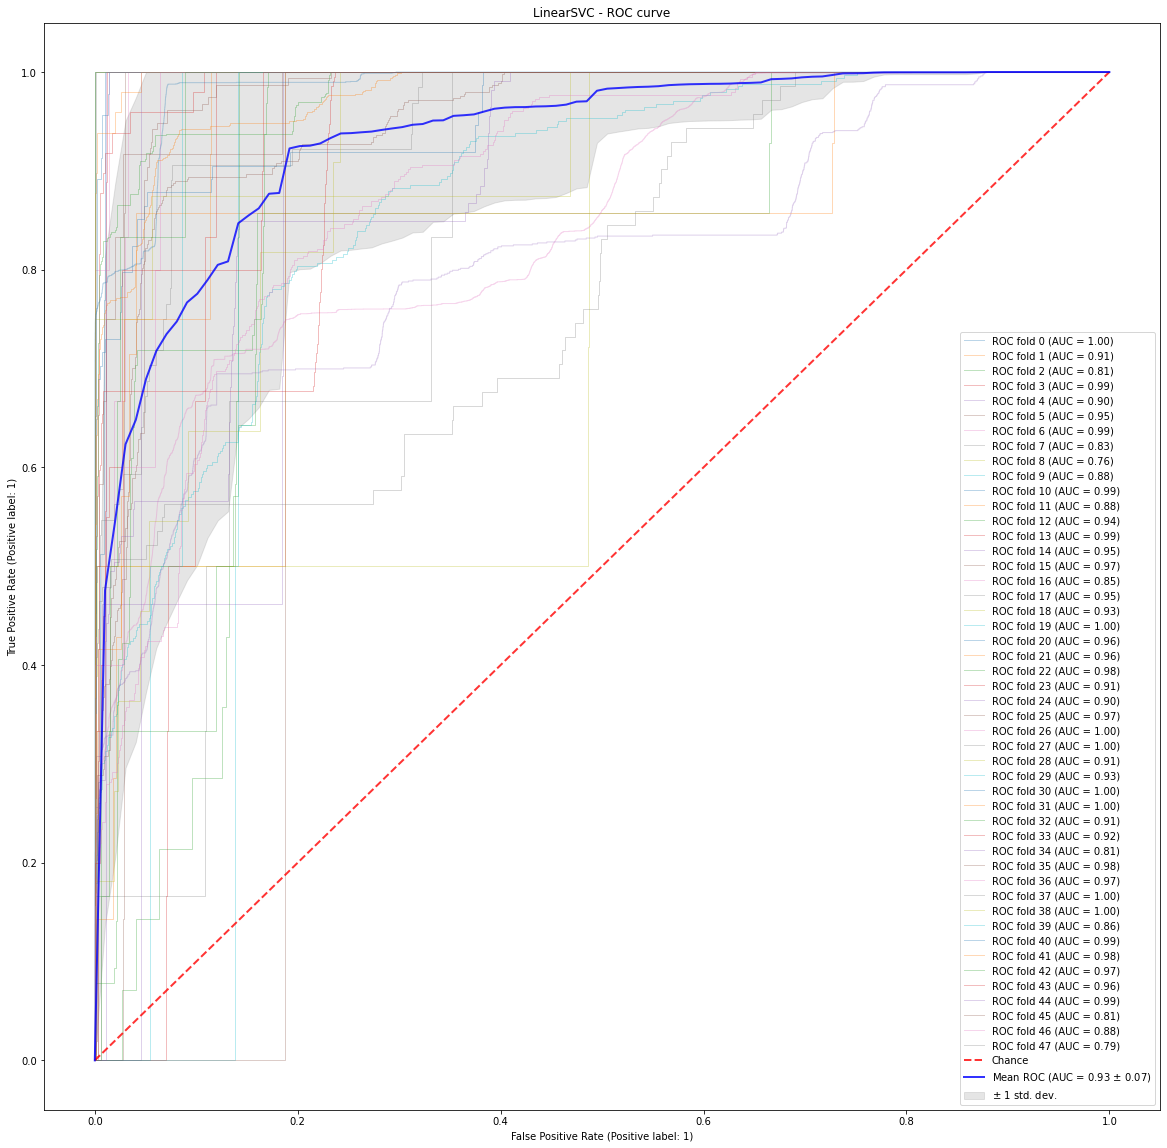

In [23]:
mf.draw_roc_cv(df_prob_svc, 'LinearSVC')

In [64]:
res_svc_proba = {'estimator': []}
from sklearn.calibration import CalibratedClassifierCV
for i,est in enumerate(results_svc['estimator']):
    res_svc_proba['estimator'].append(CalibratedClassifierCV(est, cv='prefit'))
    res_svc_proba['estimator'][i].fit(X_learning[learning_df['group_code'] == i].values, y_learning[learning_df['group_code'] == i])

In [13]:
res_svc_proba['estimator'][0].predict_proba(X_learning[learning_df['group_code'] == 0].iloc[0:1])

array([[0.73301493, 0.26698507]])

In [65]:
prob_df_svc = mf.get_probabilities_norm(X_learning.columns, res_svc_proba)

In [20]:
prob_df_svc

,0,1
0,0.272313,0.727687
1,0.271988,0.728012
2,0.272218,0.727782
3,0.272296,0.727704
4,0.272224,0.727776
...,...,...
2213175,0.995514,0.004486
2213176,0.995504,0.004496
2213177,0.995908,0.004092
2213178,0.995589,0.004411


In [25]:
df_all_small.iloc[:,:-2]

,virus,host,blastn,crisprdetect-2mismatch,gc_content,k25,k6-chebyshev,k6-kendalltau,k6-manhattan,piler-2mismatch,wish,group,group_code,y
0,NC_010363,NC_008527,60.8,0.0,0.021973,0.0,0.002122,0.398421,0.382144,0.0,-1.33553,Streptococcaceae,41,1
1,NC_010363,NC_002662,59.0,0.0,0.016709,0.0,0.001929,0.397773,0.377498,0.0,-1.33035,Streptococcaceae,41,1
2,NC_010363,NC_017949,59.0,0.0,0.020818,0.0,0.002088,0.396969,0.379686,0.0,-1.33341,Streptococcaceae,41,1
3,NC_010363,NC_017492,59.0,0.0,0.022209,0.0,0.002131,0.396148,0.380930,0.0,-1.33767,Streptococcaceae,41,1
4,NC_010363,NC_009004,59.0,0.0,0.020871,0.0,0.002088,0.397095,0.379834,0.0,-1.33341,Streptococcaceae,41,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2213175,NC_024392,NC_009664,0.0,0.0,0.380006,0.0,0.006918,1.525475,1.535981,0.0,-1.46593,Listeriaceae,22,0
2213176,NC_024392,NC_011891,0.0,0.0,0.382821,0.0,0.010627,1.509128,1.523096,0.0,-1.47323,Listeriaceae,22,0
2213177,NC_024392,NC_015514,0.0,0.0,0.382899,0.0,0.007646,1.544129,1.575653,0.0,-1.45837,Listeriaceae,22,0
2213178,NC_024392,NC_011145,0.0,0.0,0.384063,0.0,0.010793,1.507242,1.526537,0.0,-1.47286,Listeriaceae,22,0


In [26]:
# get probabilities and put them to the results dict
svc_probs_df = pd.concat([df_all_small.iloc[:,:-2], prob_df_svc], axis=1)

In [27]:
svc_probs_df.head()

,virus,host,blastn,crisprdetect-2mismatch,gc_content,k25,k6-chebyshev,k6-kendalltau,k6-manhattan,piler-2mismatch,wish,group,group_code,y,0,1
0,NC_010363,NC_008527,60.8,0.0,0.021973,0.0,0.002122,0.398421,0.382144,0.0,-1.33553,Streptococcaceae,41,1,0.272313,0.727687
1,NC_010363,NC_002662,59.0,0.0,0.016709,0.0,0.001929,0.397773,0.377498,0.0,-1.33035,Streptococcaceae,41,1,0.271988,0.728012
2,NC_010363,NC_017949,59.0,0.0,0.020818,0.0,0.002088,0.396969,0.379686,0.0,-1.33341,Streptococcaceae,41,1,0.272218,0.727782
3,NC_010363,NC_017492,59.0,0.0,0.022209,0.0,0.002131,0.396148,0.380930,0.0,-1.33767,Streptococcaceae,41,1,0.272296,0.727704
4,NC_010363,NC_009004,59.0,0.0,0.020871,0.0,0.002088,0.397095,0.379834,0.0,-1.33341,Streptococcaceae,41,1,0.272224,0.727776


In [28]:
svc_probs_df.to_csv('test/dfs&results/df_all_linsvc.tsv', sep='\t')

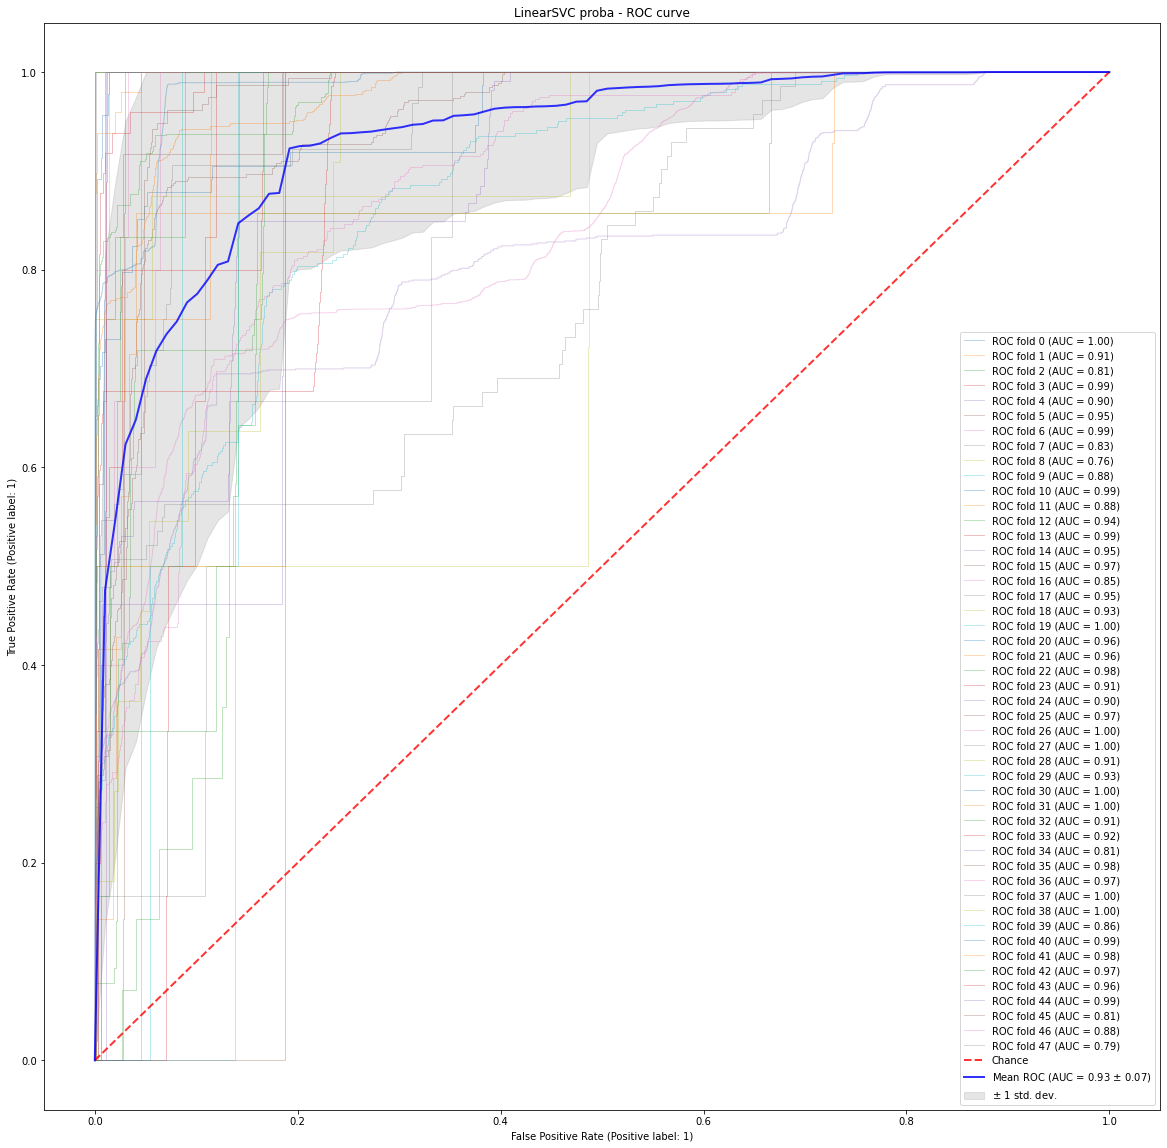

In [29]:
mf.draw_roc_cv(svc_probs_df.loc[:,['y', '0', '1']], 'LinearSVC proba')

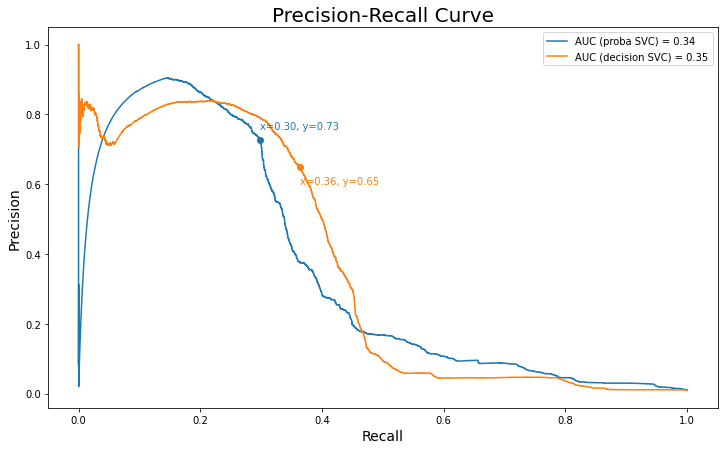

In [38]:
mf.draw_precision_recall_curve([svc_probs_df, df_prob_svc], ['proba SVC', 'decision SVC'])

## SGD

In [6]:
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier

logo = LeaveOneGroupOut()
pipe = Pipeline([
    ('normalize', Normalizer()),
    ('svc', SGDClassifier(alpha=0.005, loss='log', penalty='l1'))])

# evaluate model
results_sgd = cross_validate(pipe, X_learning.values, y_learning, scoring='f1', 
                        cv=logo, groups=groups, n_jobs=-1, return_estimator=True)

In [ ]:
dump(results_sgd, 'test/dfs&results/results_sgd.joblib')

['test/dfs&results/results_sgd.joblib']

In [67]:
# get probabilities and put them to the results dict
sgd_probs_df = mf.get_probabilities_norm(X_learning.columns, results_sgd)

In [47]:
df_sgd = pd.concat([df_all_small.iloc[:,:-2], sgd_probs_df], axis=1) 

In [48]:
df_sgd.head()

,virus,host,blastn,crisprdetect-2mismatch,gc_content,k25,k6-chebyshev,k6-kendalltau,k6-manhattan,piler-2mismatch,wish,group,group_code,y,0,1
0,NC_010363,NC_008527,60.8,0.0,0.021973,0.0,0.002122,0.398421,0.382144,0.0,-1.33553,Streptococcaceae,41,1,0.202477,0.797523
1,NC_010363,NC_002662,59.0,0.0,0.016709,0.0,0.001929,0.397773,0.377498,0.0,-1.33035,Streptococcaceae,41,1,0.202557,0.797443
2,NC_010363,NC_017949,59.0,0.0,0.020818,0.0,0.002088,0.396969,0.379686,0.0,-1.33341,Streptococcaceae,41,1,0.202583,0.797417
3,NC_010363,NC_017492,59.0,0.0,0.022209,0.0,0.002131,0.396148,0.380930,0.0,-1.33767,Streptococcaceae,41,1,0.202598,0.797402
4,NC_010363,NC_009004,59.0,0.0,0.020871,0.0,0.002088,0.397095,0.379834,0.0,-1.33341,Streptococcaceae,41,1,0.202585,0.797415


In [50]:
df_sgd.to_csv('test/dfs&results/df_all_sgd.tsv', sep='\t')

## KNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier

X_learning = learning_df.drop(['virus', 'host', 'group', 'group_code', 'y'], axis=1)
y_learning = learning_df['y']

logo = LeaveOneGroupOut()
pipe = Pipeline([
    ('normalize', Normalizer()),
    ('knn', KNeighborsClassifier(algorithm='kd_tree', leaf_size=5)),
])

# evaluate model
results_knn = cross_validate(pipe, X_learning.values, y_learning, scoring='f1', 
                        cv=logo, groups=groups, n_jobs=-1, return_estimator=True)

In [68]:
dump(results_knn, 'test/dfs&results/results_knn.joblib')

['test/dfs&results/results_knn.joblib']

In [59]:
# get probabilities and put them to the results dict
knn_prob_df = mf.get_probabilities(X_learning.columns, results_knn, df_all, normalize=True)

In [70]:
df_knn = pd.concat([df_all_small.iloc[:,:-2], knn_prob_df], axis=1)

In [73]:
df_knn.to_csv('test/dfs&results/df_all_knn.tsv', sep='\t')

## XGBoost

In [4]:
from sklearn.model_selection import LeaveOneGroupOut, cross_validate
from xgboost import XGBClassifier

X_learning = learning_df.drop(['virus', 'host', 'group', 'group_code', 'y'], axis=1)
y_learning = learning_df['y']
groups = learning_df['group_code'].to_numpy()

xgb_tree = XGBClassifier(booster = 'gbtree', reg_alpha = 0, 
        gamma = 0.5, max_depth = 2, min_child_weight = 3, reg_lambda = 1)
logo = LeaveOneGroupOut()

# evaluate model
results_xgb_tree = cross_validate(xgb_tree, X_learning.values, y_learning, scoring='f1', 
                        cv=logo, groups=groups, n_jobs=-1, return_estimator=True)

In [5]:
xgb_lin = XGBClassifier(booster='gblinear', reg_alpha = 0, 
            reg_lambda = 0.1, objective='binary:logistic')
results_xgb_lin = cross_validate(xgb_lin, X_learning.values, y_learning, scoring='f1', 
                        cv=logo, groups=groups, n_jobs=-1, return_estimator=True)

In [6]:
df_xgb_tree = pd.concat([df_all,
        mf.get_probabilities(X_learning.columns, results_xgb_tree, df_all)], axis=1)
df_xgb_lin = pd.concat([df_all,
        mf.get_probabilities(X_learning.columns, results_xgb_lin, df_all)], axis=1)

In [13]:
df_xgb_tree.to_pickle('test/dfs&results/df_all_xgb_tree.pkl')
df_xgb_lin.to_pickle('test/dfs&results/df_all_xgb_lin.pkl')

In [8]:
orgs = mf.load_in_taxonomy_json()

In [10]:
xgb_tree_percentages = mf.get_correct_preds_percentages(df_xgb_tree, orgs, 'xgb_tree')
xgb_lin_percentages = mf.get_correct_preds_percentages(df_xgb_lin, orgs, 'xgb_lin')

In [11]:
xgb_tree_percentages

,species_correct,genus_correct,family_correct,order_correct,class_correct,phylum_correct,superkingdom_correct
xgb_tree,38.556851,49.927114,58.163265,63.629738,83.163265,89.504373,100.0


In [12]:
xgb_lin_percentages

,species_correct,genus_correct,family_correct,order_correct,class_correct,phylum_correct,superkingdom_correct
xgb_lin,56.712784,67.482014,96.092972,97.244051,98.461538,99.36912,100.0


## SVM (non-linear)

In [13]:
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import LeaveOneGroupOut, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# get X and y
X_learning = learning_df.drop(['virus', 'host', 'group', 'group_code', 'y'], axis=1)
y_learning = learning_df['y']
groups = learning_df['group_code'].to_numpy()

logo = LeaveOneGroupOut()
pipe = Pipeline([
    ('normalize', Normalizer()),
    ('svc', SVC(kernel='rbf', C=0.1, probability=True))])

In [14]:
# evaluate model
results_svm = cross_validate(pipe, X_learning.to_numpy(), y_learning, scoring='f1', 
                        cv=logo, groups=groups, n_jobs=-1, return_estimator=True)

In [15]:
from joblib import dump
dump(results_svm, './test/dfs&results/results_svm.joblib')

['./test/dfs&results/results_svm.joblib']

In [16]:
df_svm = pd.concat([df_all, mf.get_probabilities(X_learning.columns, results_svm, df_all, normalize=True)], axis=1)

In [17]:
df_svm.to_csv('./test/dfs&results/df_svm.tsv', sep='\t')

# Visualisation

Get dfs

In [5]:
df_knn = pd.read_csv('test/dfs&results/df_all_knn.tsv', sep='\t')
df_linsvc = pd.read_csv('test/dfs&results/df_all_linsvc.tsv', sep='\t')
df_lrc = pd.read_csv('test/dfs&results/df_all_lrc.tsv', sep='\t')
df_rfc = pd.read_csv('test/dfs&results/df_all_rfc.tsv', sep='\t')
df_sgd = pd.read_csv('test/dfs&results/df_all_sgd.tsv', sep='\t')
df_xgb_tree = pd.read_pickle('test/dfs&results/df_all_xgb_tree.pkl')
df_xgb_lin = pd.read_pickle('test/dfs&results/df_all_xgb_lin.pkl')
df_svm = pd.read_csv('test/dfs&results/df_svm.tsv', sep='\t')
df_dnn = pd.read_csv('./test/dfs&results/df_custom_dnn.tsv', sep='\t')

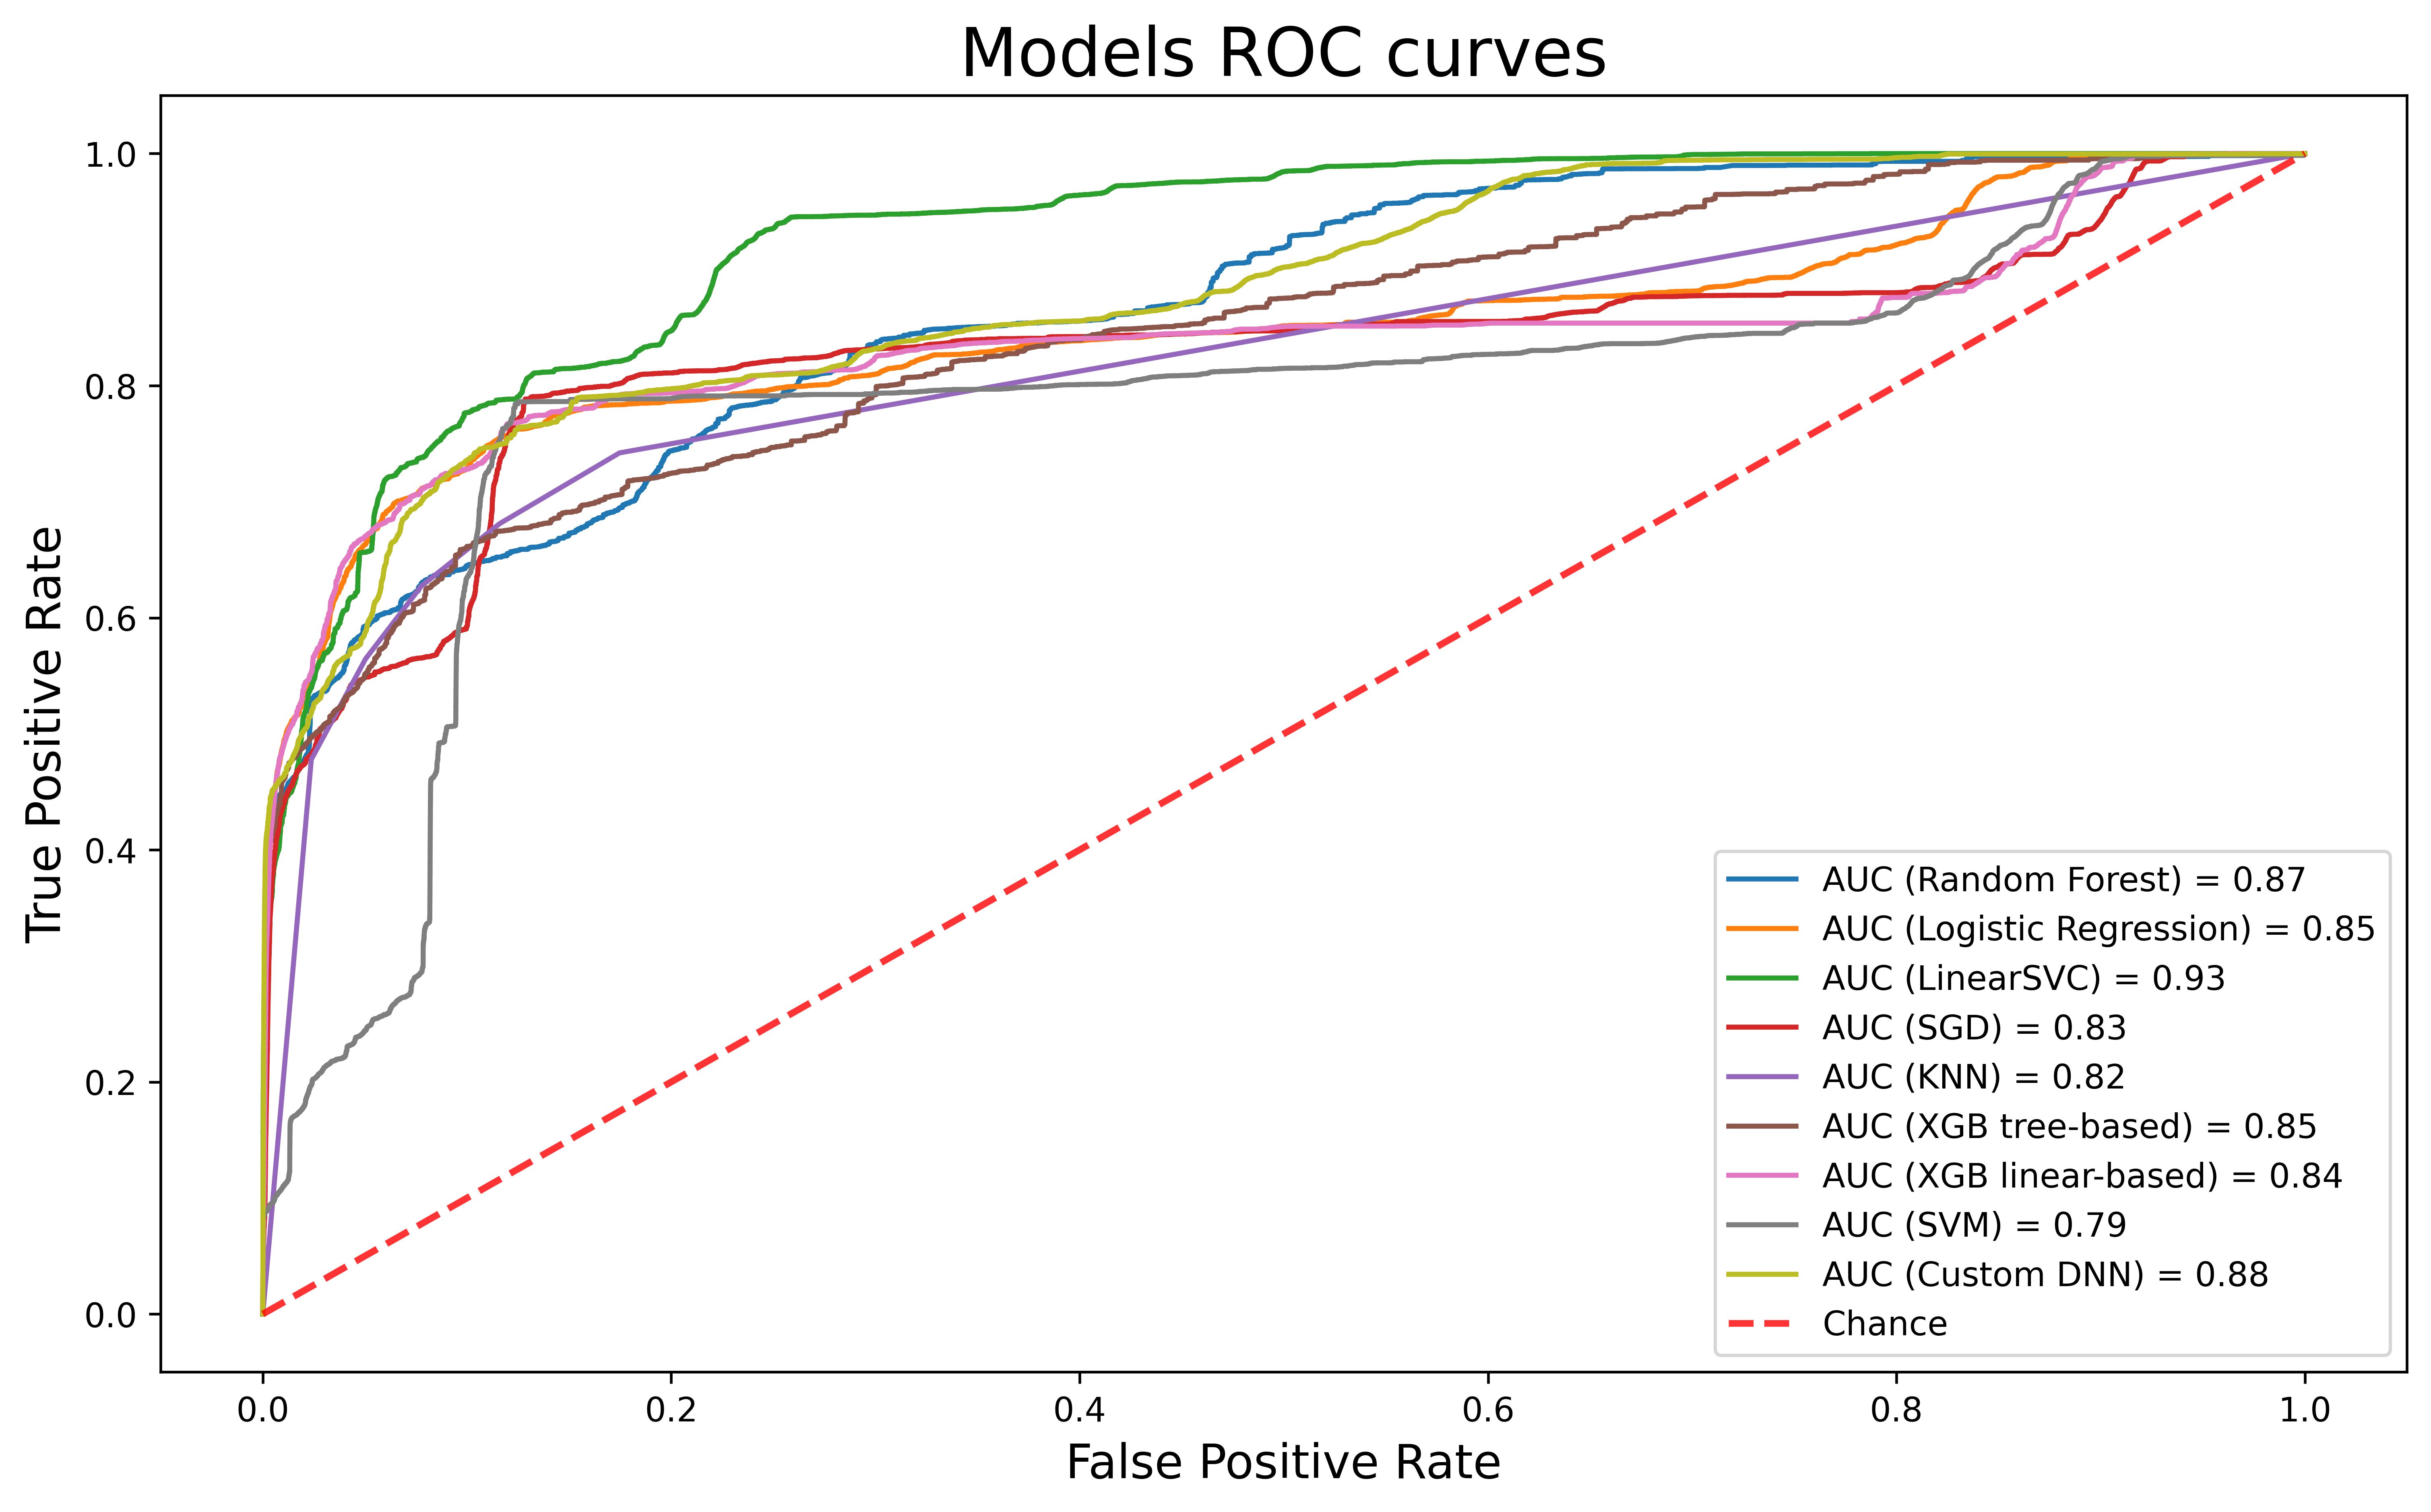

In [32]:
mf.draw_rocs(
    dfs=[
        df_rfc[['y', '0', '1']],
        df_lrc[['y', '0', '1']],
        df_linsvc[['y', '0', '1']],
        df_sgd[['y', '0', '1']],
        df_knn[['y', '0', '1']],
        df_xgb_tree[['y', '0', '1']],
        df_xgb_lin[['y', '0', '1']],
        df_svm[['y', '0', '1']],
        df_dnn[['y', '0', '1']],
    ],
    names=[
        'Random Forest',
        'Logistic Regression',
        'LinearSVC',
        'SGD',
        'KNN',
        'XGB tree-based',
        'XGB linear-based',
        'SVM',
        'Custom DNN'
    ],
    plot_name='Models ROC curves'
)

In [5]:
from importlib import reload
reload(mf)

<module 'master_functions' from 'c:\\licencjat\\master_functions.py'>

c:\licencjat\master_functions.py:149: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = np.divide(2*recall*precision, recall+precision)


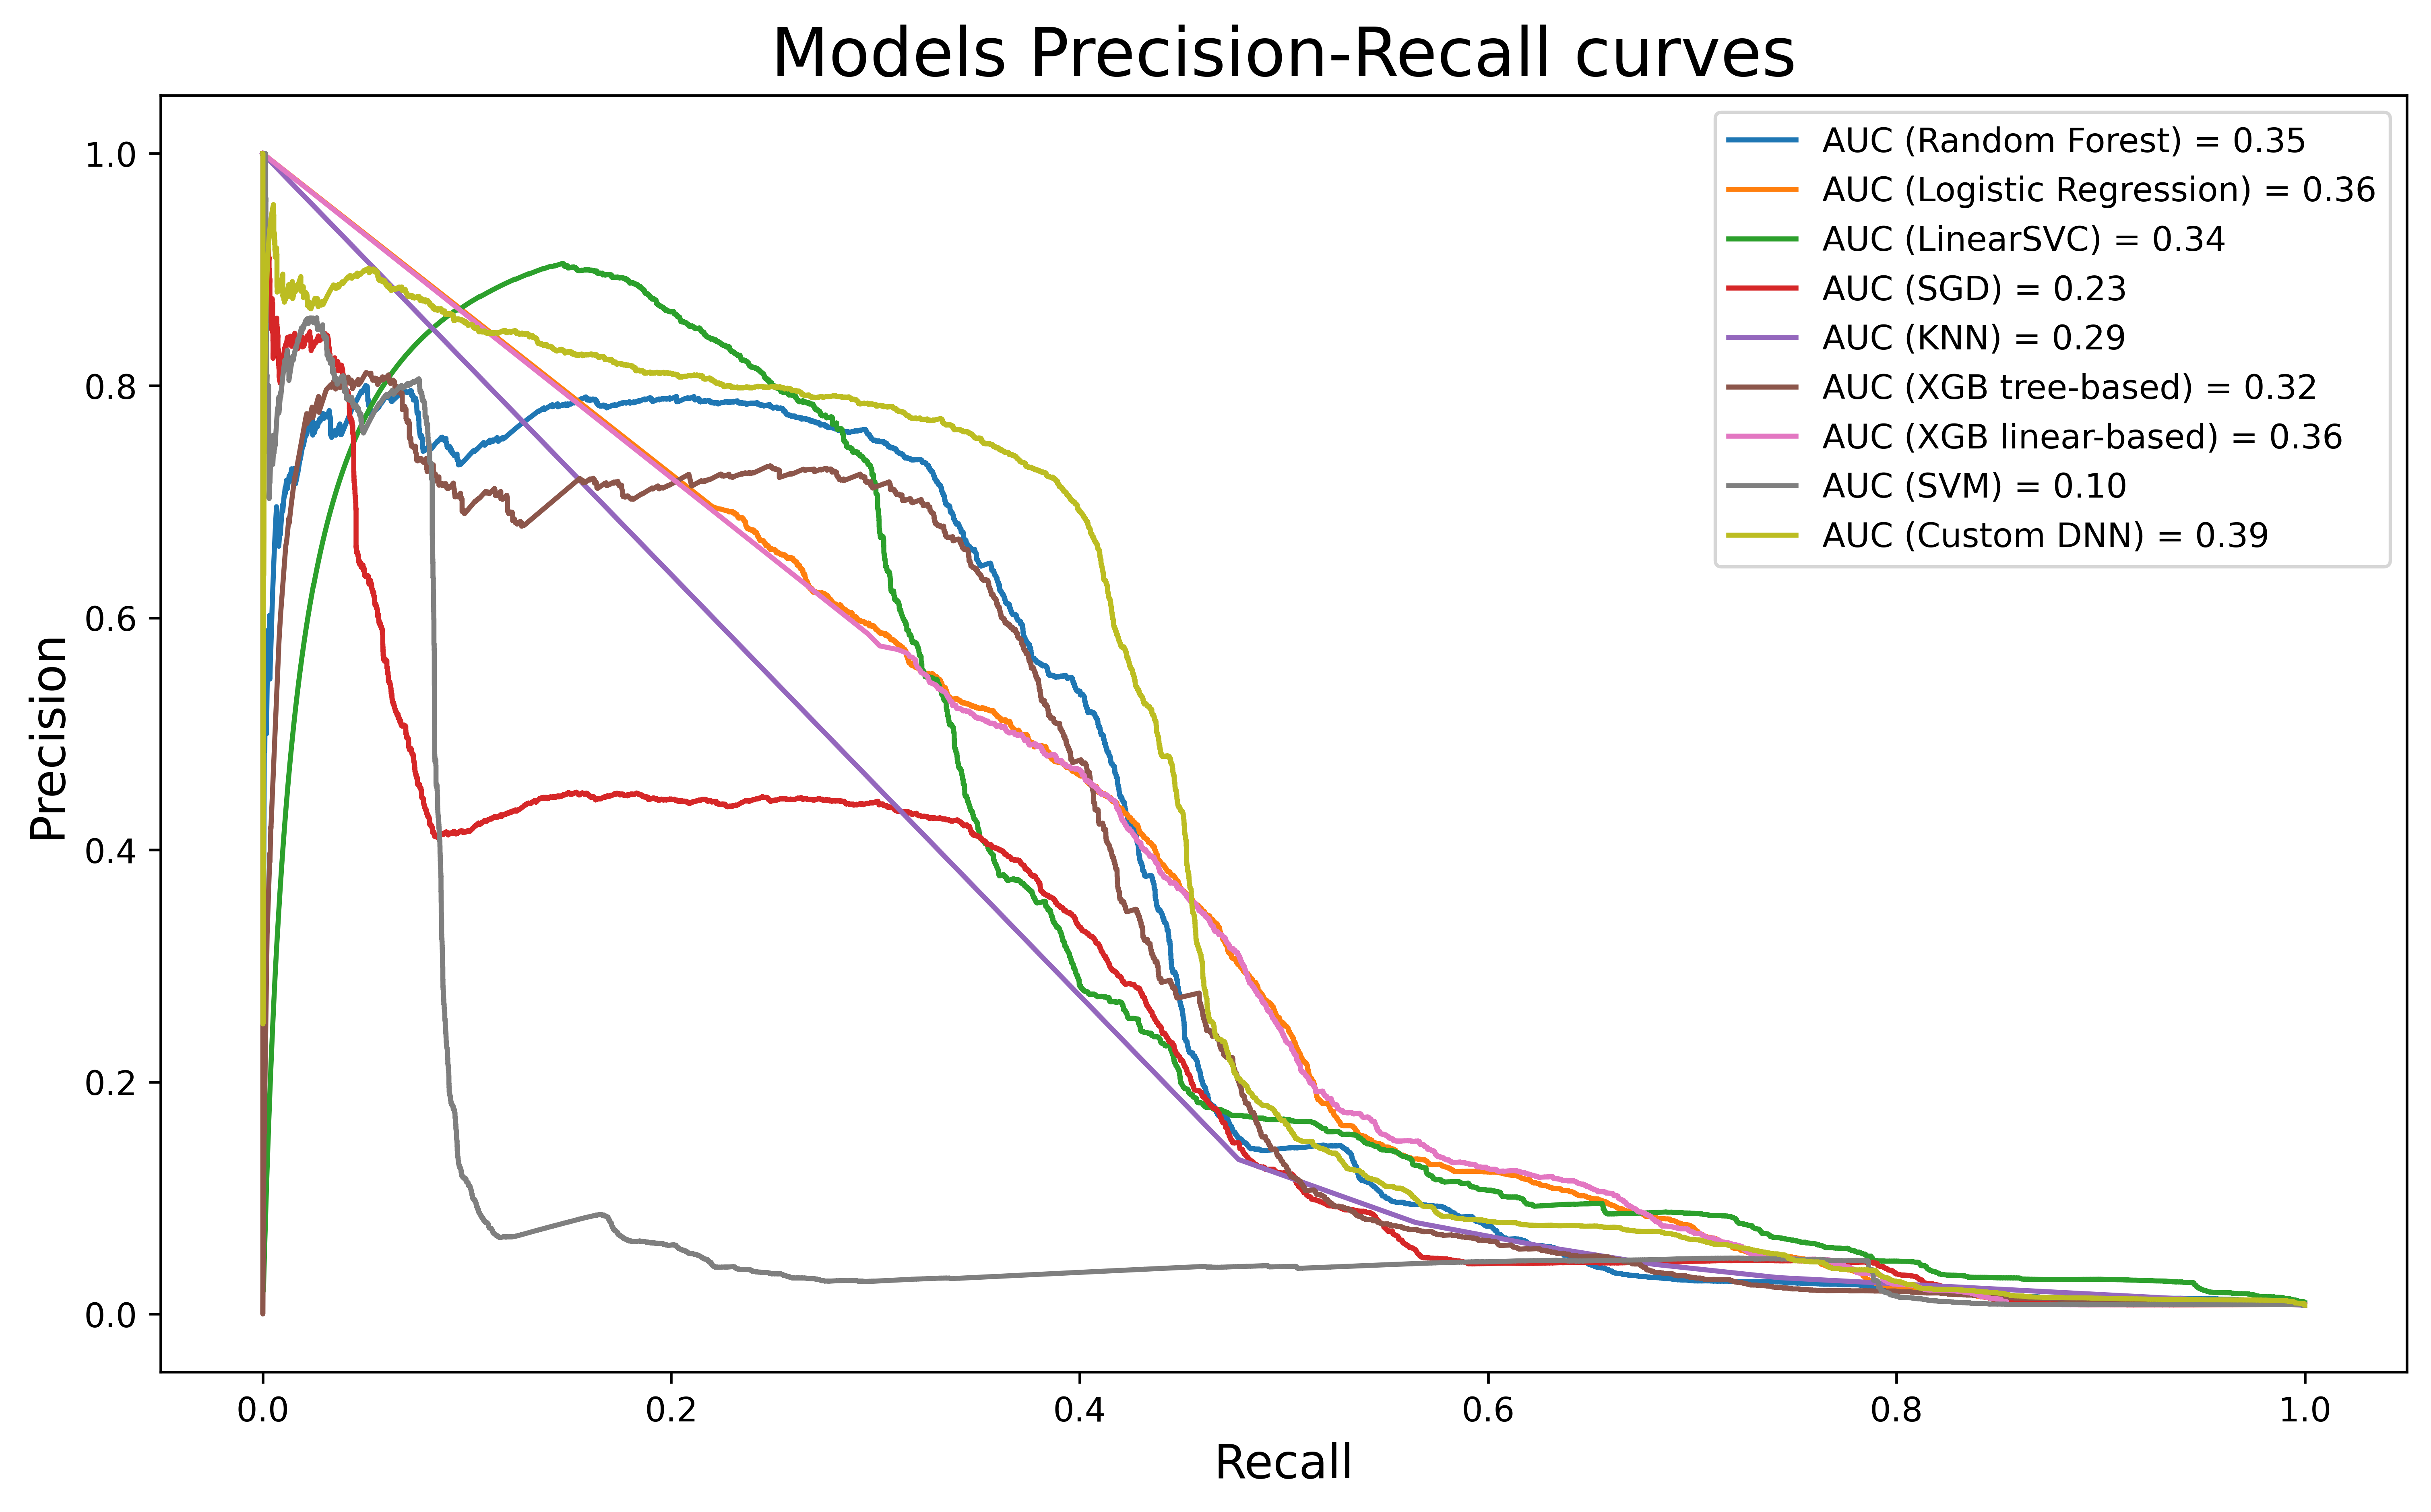

In [33]:
mf.draw_precision_recall_curve(
    dfs=[
        df_rfc[['y', '0', '1']],
        df_lrc[['y', '0', '1']],
        df_linsvc[['y', '0', '1']],
        df_sgd[['y', '0', '1']],
        df_knn[['y', '0', '1']],
        df_xgb_tree[['y', '0', '1']],
        df_xgb_lin[['y', '0', '1']],
        df_svm[['y', '0', '1']],
        df_dnn[['y', '0', '1']]
    ],
    names=[
        'Random Forest',
        'Logistic Regression',
        'LinearSVC',
        'SGD',
        'KNN',
        'XGB tree-based',
        'XGB linear-based',
        'SVM',
        'Custom DNN'
    ],
    plot_name='Models Precision-Recall curves'
)

# Get percentages 

In [6]:
orgs = mf.load_in_taxonomy_json()

In [7]:
dfs=[
    df_rfc,
    df_lrc,
    df_svm,
    df_linsvc,
    df_sgd,
    df_knn,
    df_xgb_tree,
    df_xgb_lin,
    df_dnn
    
]
names=[
    'Random Forest',
    'Logistic Regression',
    'SVM',
    'LinearSVC',
    'SGD',
    'KNN',
    'XGB tree-based',
    'XGB linear-based',
    'Custom DNN'
]

In [7]:
from importlib import reload
reload(mf)

<module 'master_functions' from 'c:\\licencjat\\master_functions.py'>

In [8]:
percentages_df = pd.DataFrame(index=names, columns=mf.get_correct_preds_percentages(df_rfc, orgs, names[0], sample=False).columns)
percentages_sampled_df = pd.DataFrame(index=names, columns=mf.get_correct_preds_percentages(df_rfc, orgs, names[0]).columns)

In [9]:
for i, df in enumerate(dfs):
    percentages_df.loc[names[i]] = mf.get_correct_preds_percentages(df, orgs, names[i], sample=False, report=True).values
    percentages_sampled_df.loc[names[i]] = mf.get_correct_preds_percentages(df, orgs, names[i]).values

Random Forest - num of preds with highest prob: 1182, mean = 1.44
Logistic Regression - num of preds with highest prob: 5855, mean = 7.14
SVM - num of preds with highest prob: 820, mean = 1.00
LinearSVC - num of preds with highest prob: 820, mean = 1.00
SGD - num of preds with highest prob: 820, mean = 1.00
KNN - num of preds with highest prob: 60157, mean = 73.36
XGB tree-based - num of preds with highest prob: 1372, mean = 1.67
XGB linear-based - num of preds with highest prob: 9035, mean = 11.02
Custom DNN - num of preds with highest prob: 846, mean = 1.03


In [11]:
percentages_df

,species correct,genus correct,family correct,order correct,class correct,phylum correct,superkingdom correct
Random Forest,44.33,59.81,70.14,74.03,86.46,91.2,100.0
Logistic Regression,65.31,72.18,95.2,96.36,97.88,98.96,100.0
SVM,45.24,60.0,70.73,77.56,85.37,89.63,100.0
LinearSVC,41.59,51.1,58.66,62.32,72.44,80.98,100.0
SGD,37.32,45.73,51.95,54.51,65.61,75.0,100.0
KNN,13.31,21.02,34.97,41.39,61.44,74.14,100.0
XGB tree-based,38.56,49.93,58.16,63.63,83.16,89.5,100.0
XGB linear-based,56.71,67.48,96.09,97.24,98.46,99.37,100.0
Custom DNN,47.75,61.7,72.22,74.59,81.44,85.7,100.0


In [23]:
percentages_df.to_csv('test/percentages_unsampled.csv')

In [11]:
percentages_sampled_df

,species correct,genus correct,family correct,order correct,class correct,phylum correct,superkingdom correct
Random Forest,35.61,54.88,67.2,72.56,85.37,90.73,100.0
Logistic Regression,39.27,55.12,69.63,77.2,86.34,93.66,100.0
SVM,45.24,60.0,70.73,77.56,85.37,89.63,100.0
LinearSVC,41.59,51.1,58.66,62.32,72.44,80.98,100.0
SGD,37.32,45.73,51.95,54.51,65.61,75.0,100.0
KNN,9.88,16.71,27.07,33.41,50.85,64.39,100.0
XGB tree-based,32.68,46.46,57.56,64.88,79.15,87.2,100.0
XGB linear-based,37.2,54.88,69.39,76.95,86.34,94.15,100.0
Custom DNN,46.95,60.73,71.34,73.78,80.85,85.24,100.0


In [24]:
percentages_sampled_df.to_csv('test/percentages_sampled.csv')

In [26]:
r = np.arange(len(percentages_df.index))

In [27]:
r

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [25]:
percentages_df.index

Index(['Random Forest', 'Logistic Regression', 'SVM', 'LinearSVC', 'SGD',
       'KNN', 'XGB tree-based', 'XGB linear-based', 'Custom DNN'],
      dtype='object')

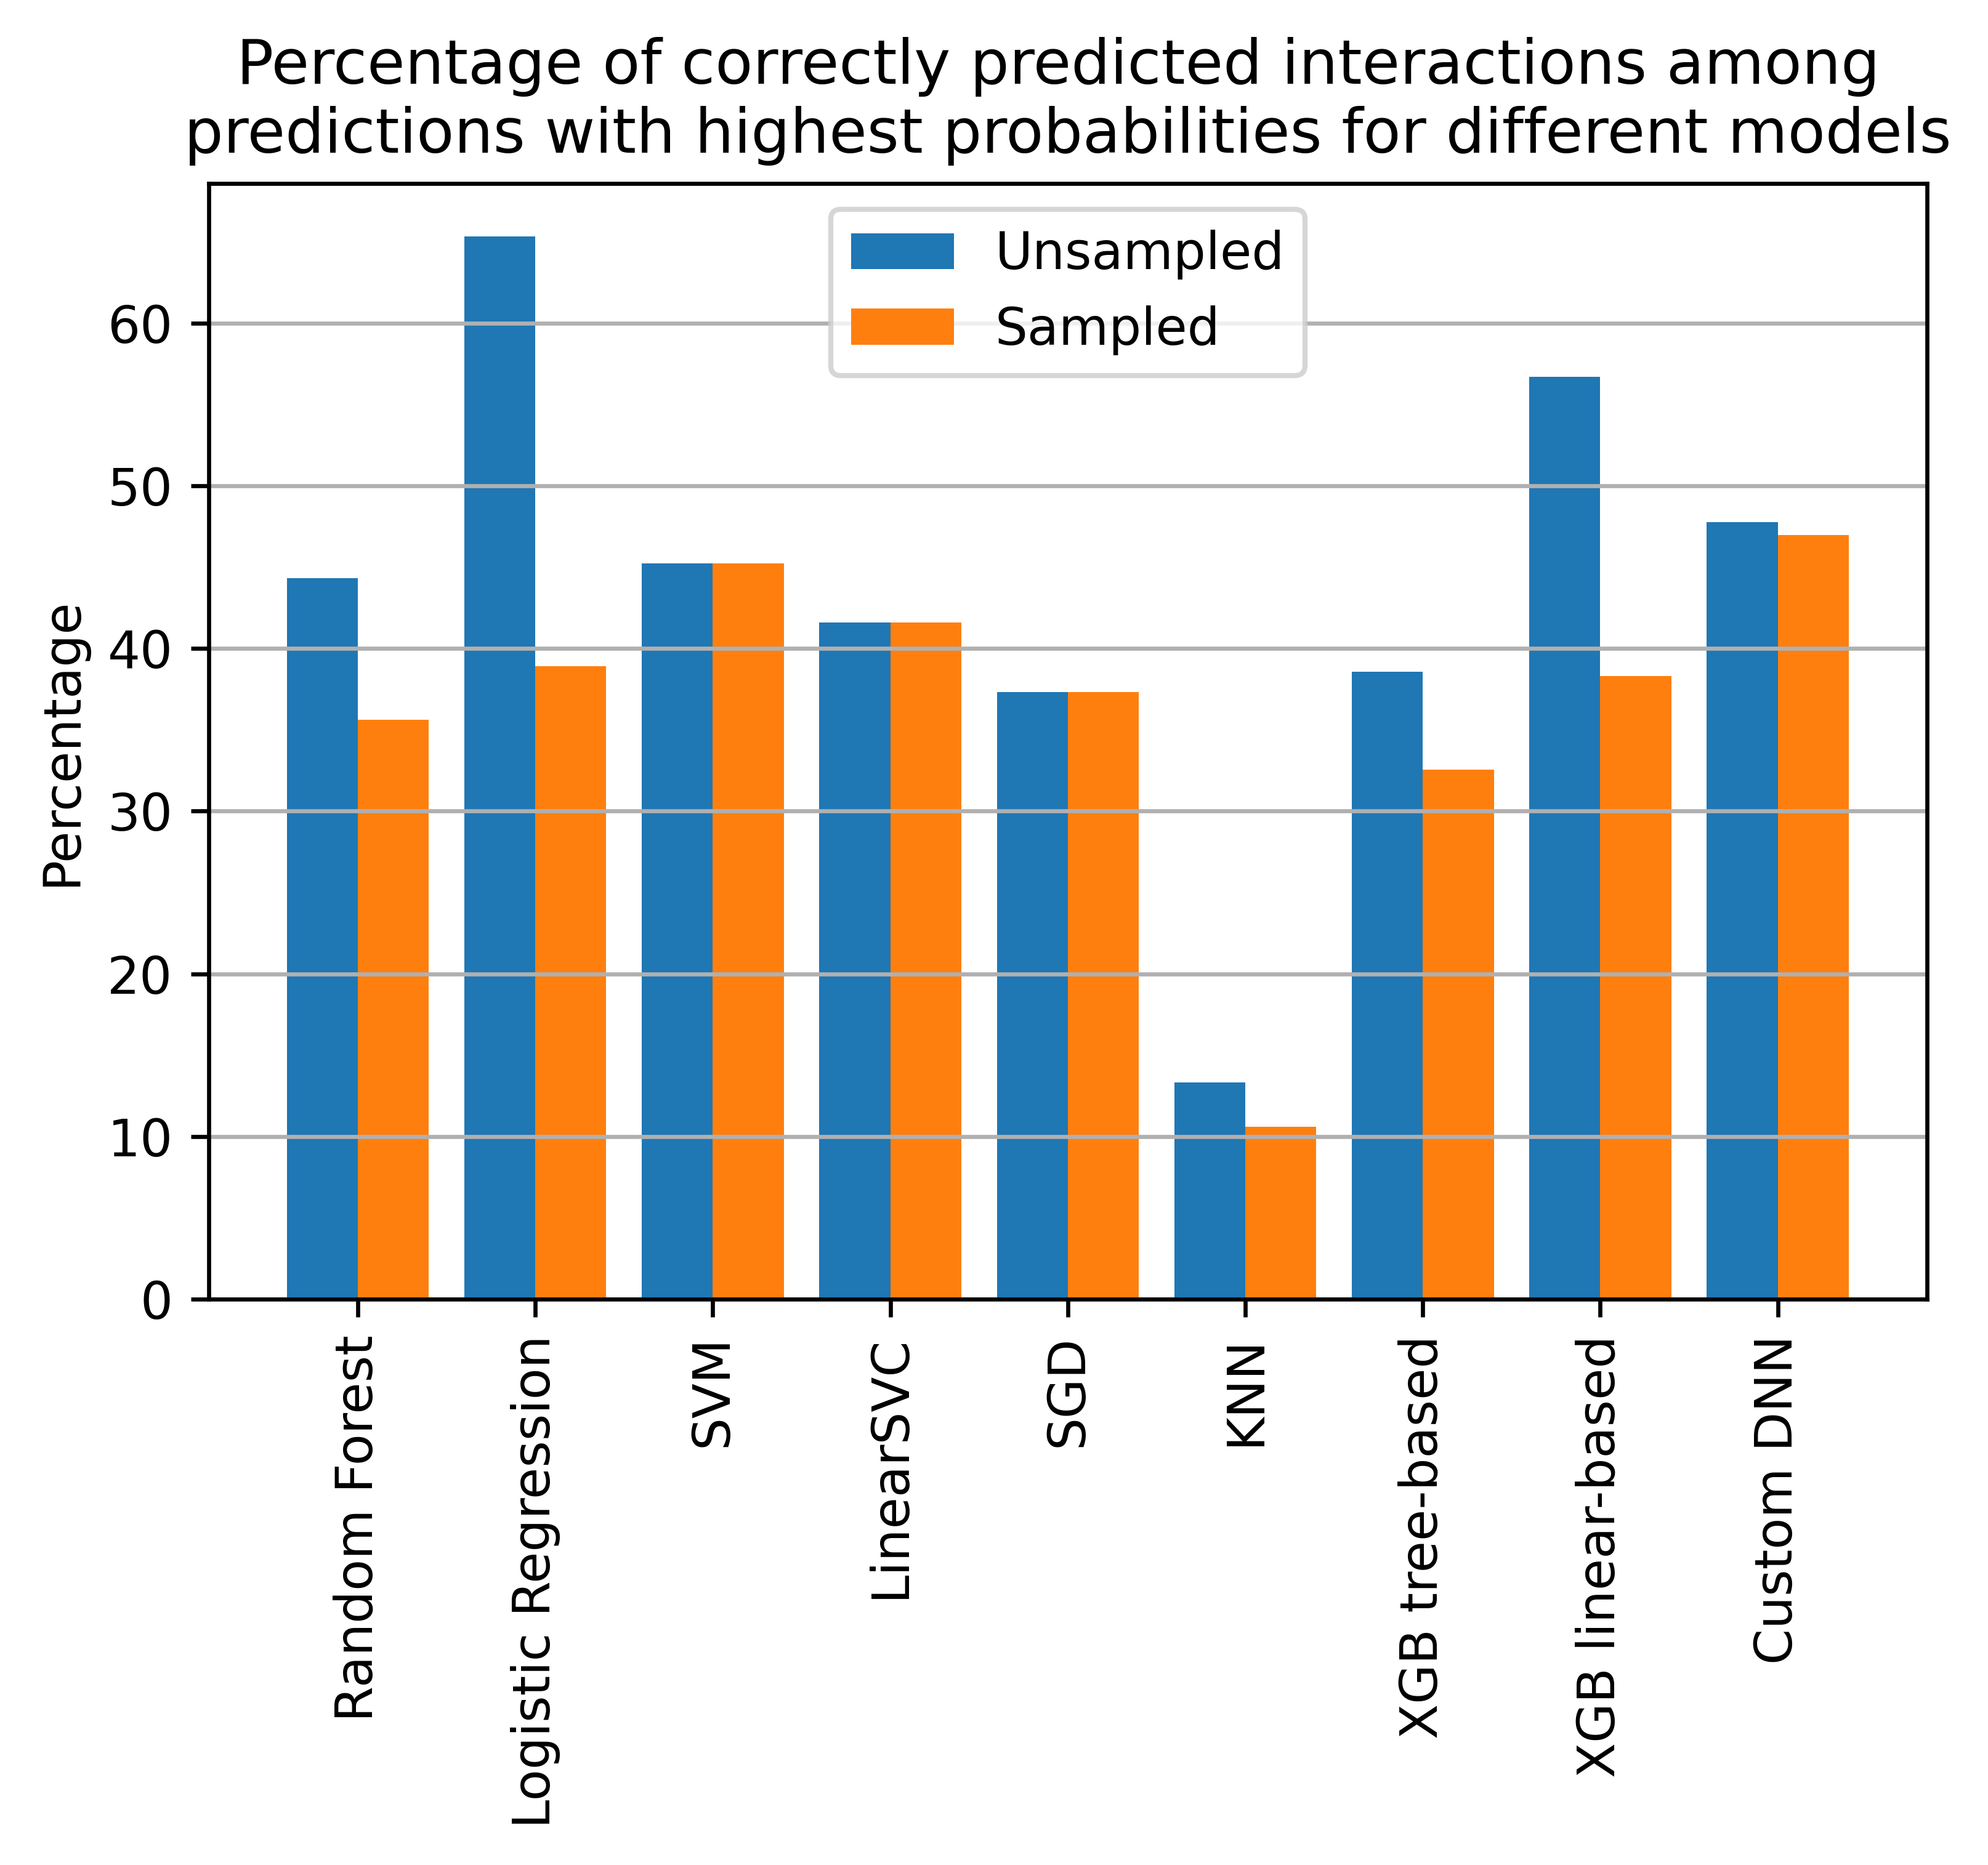

In [31]:
plt.bar(r - 0.2, percentages_df['species correct'], 0.4, label='Unsampled')
plt.bar(r + 0.2, percentages_sampled_df['species correct'], 0.4, label='Sampled')
plt.ylabel(ylabel='Percentage')
plt.xticks(r, percentages_df.index, rotation=90)
plt.grid(axis='y')
plt.title('Percentage of correctly predicted interactions among \npredictions with highest probabilities for different models')
plt.legend(loc='upper center')
plt.show()

In [ ]:
fig, axes = plt.subplots(1,2)
axs = axes.ravel()
box = axs[1].get_position()
box.x0 = box.x0 + 0.05
box.x1 = box.x1 + 0.05
axs[1].set_position(box)

cols = percentages_df.columns


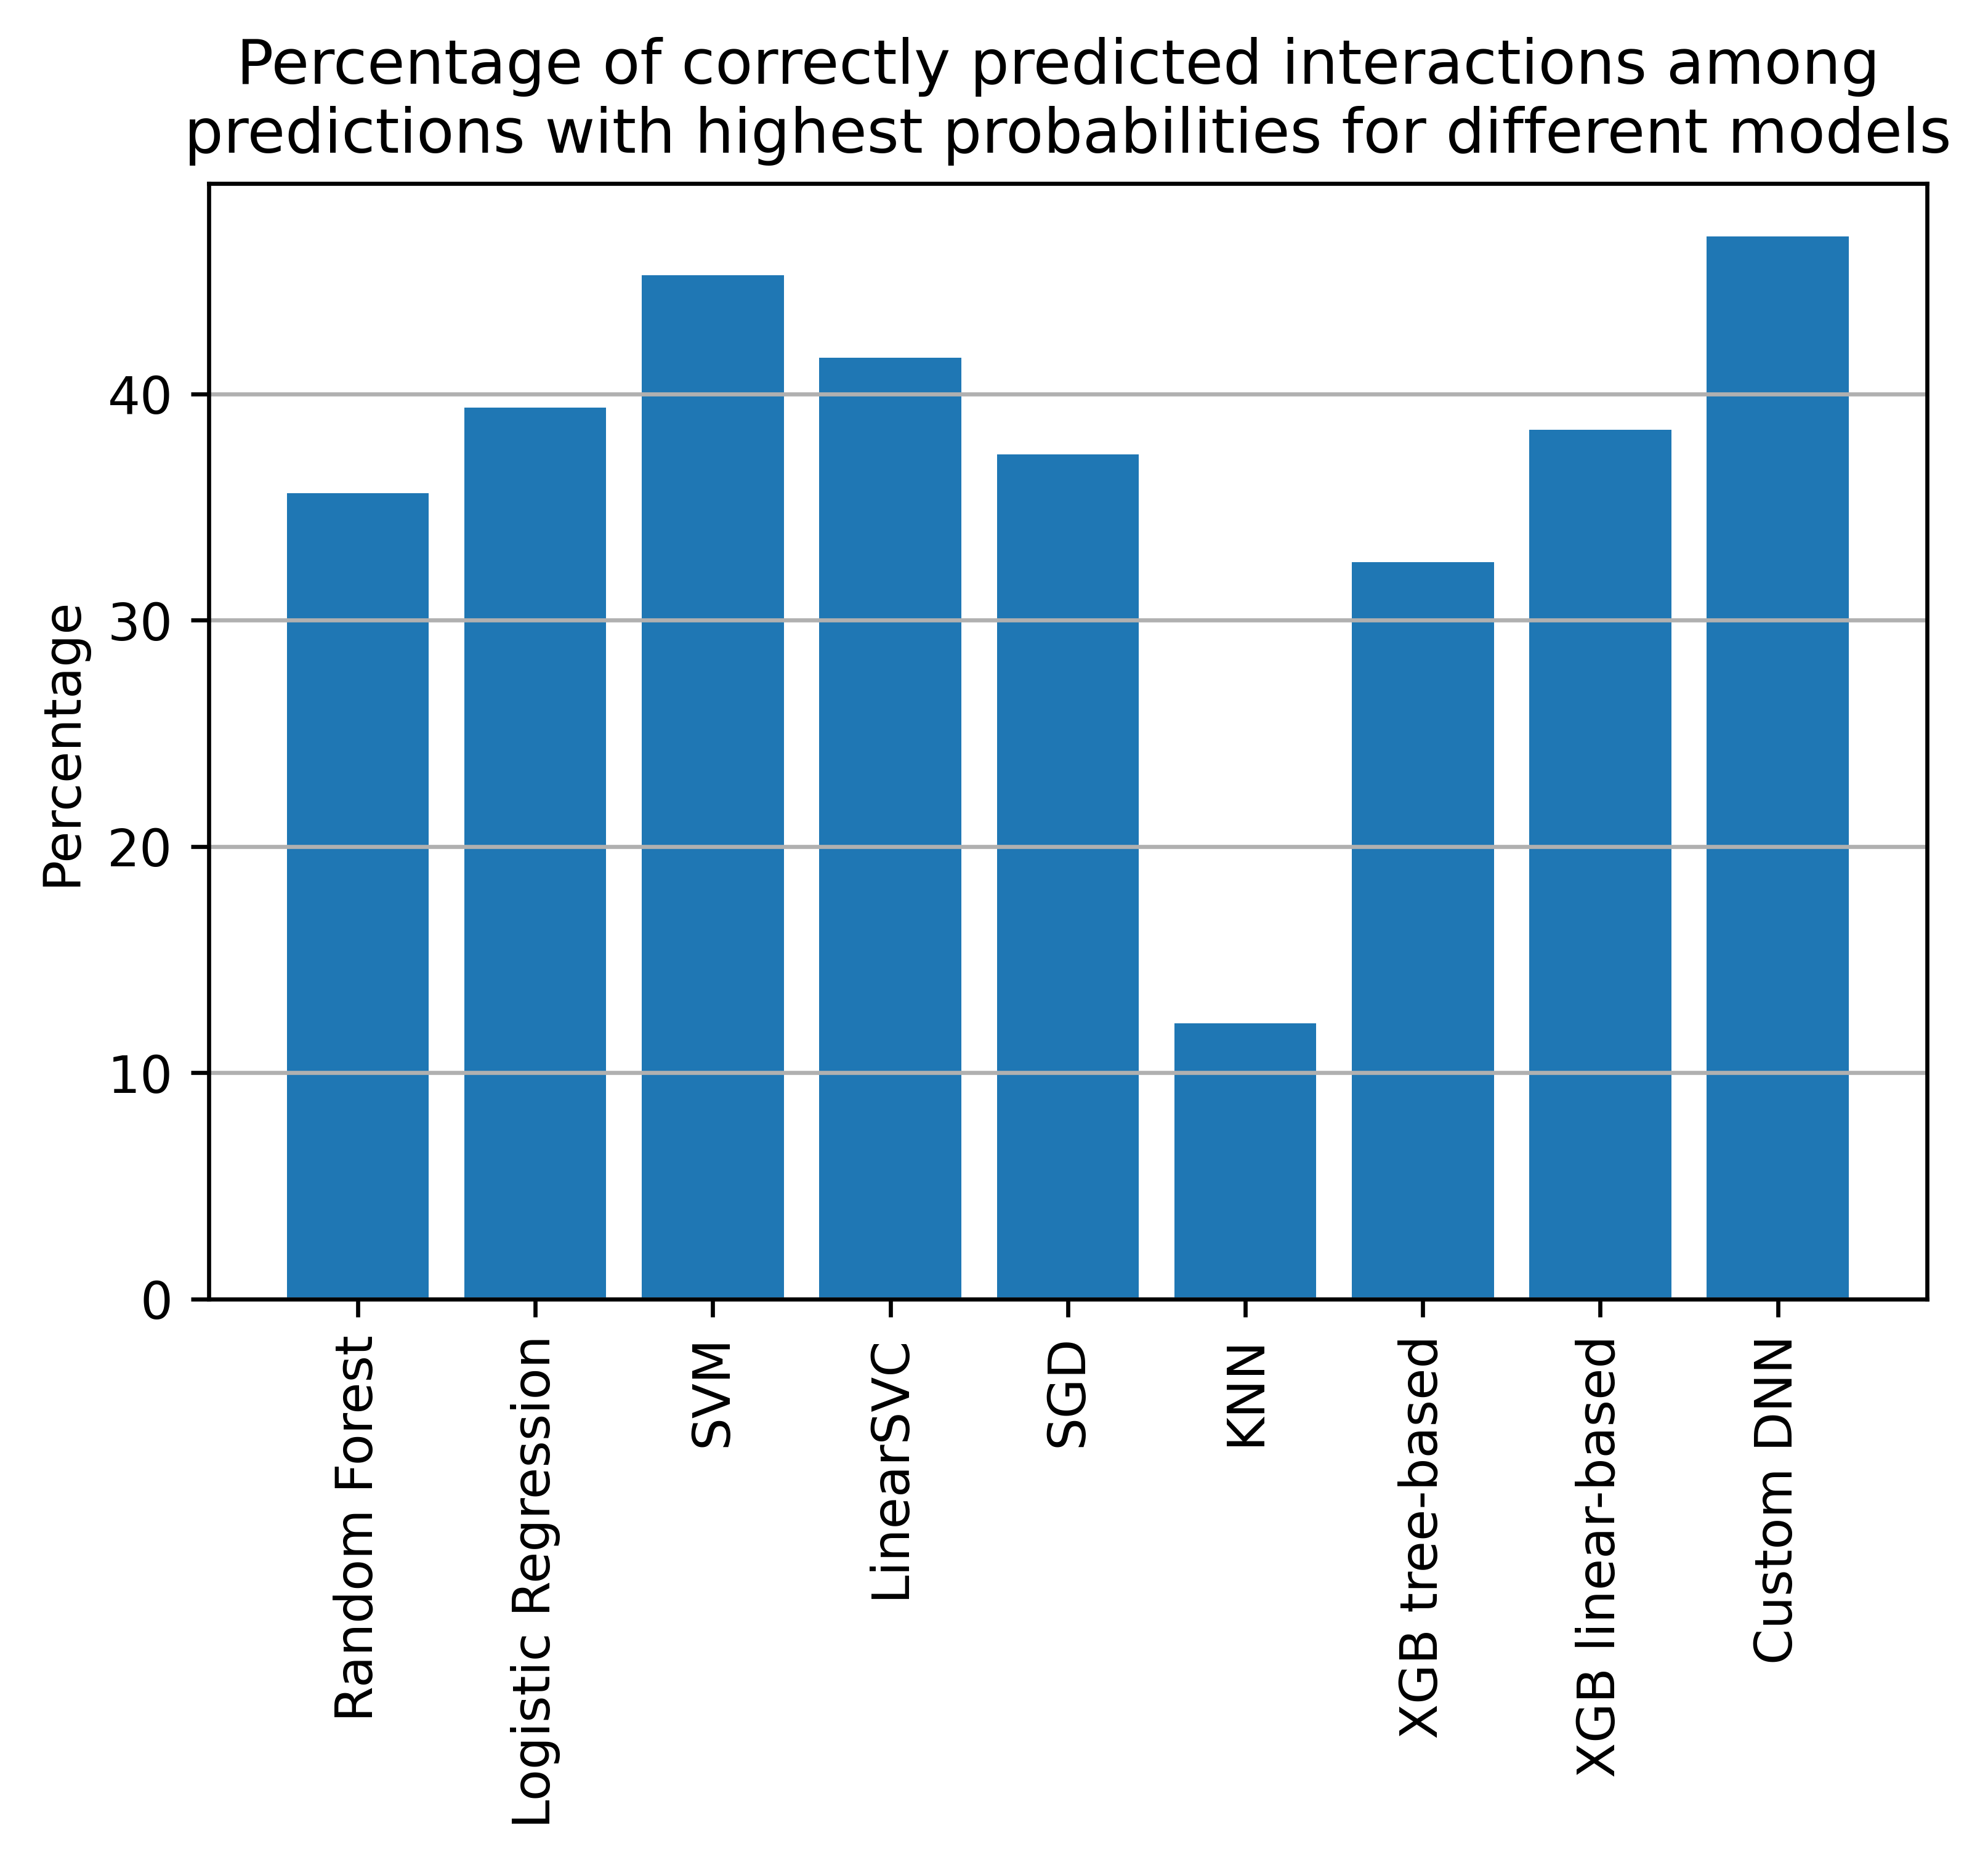

In [36]:
plt.bar(percentages_sampled_df.index, percentages_sampled_df['species correct'])
plt.ylabel(ylabel='Percentage')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.title('Percentage of correctly predicted interactions among \npredictions with highest probabilities for different models')
plt.show()

# Get overall accuracies

In [14]:
for df in dfs:
    df['pred'] = df.apply(lambda x: 1 if x['1'] > x['0'] else 0, axis=1)

In [15]:
dfs[0].head()

,Unnamed: 0,virus,host,blastn,crisprdetect-2mismatch,gc_content,k25,k6-chebyshev,k6-kendalltau,k6-manhattan,piler-2mismatch,wish,group,group_code,y,0,1,pred
0,0,NC_010363,NC_008527,60.8,0.0,0.021973,0.0,0.002122,0.398421,0.382144,0.0,-1.33553,Streptococcaceae,41,1,0.342766,0.657234,1
1,1,NC_010363,NC_002662,59.0,0.0,0.016709,0.0,0.001929,0.397773,0.377498,0.0,-1.33035,Streptococcaceae,41,1,0.338572,0.661428,1
2,2,NC_010363,NC_017949,59.0,0.0,0.020818,0.0,0.002088,0.396969,0.379686,0.0,-1.33341,Streptococcaceae,41,1,0.342070,0.657930,1
3,3,NC_010363,NC_017492,59.0,0.0,0.022209,0.0,0.002131,0.396148,0.380930,0.0,-1.33767,Streptococcaceae,41,1,0.347298,0.652702,1
4,4,NC_010363,NC_009004,59.0,0.0,0.020871,0.0,0.002088,0.397095,0.379834,0.0,-1.33341,Streptococcaceae,41,1,0.342070,0.657930,1


In [16]:
from sklearn.metrics import accuracy_score
accuracies = []
for df in dfs:
    accuracies.append(accuracy_score(df['y'], df['pred']))

In [17]:
for el in zip(accuracies, names):
    print(f'{el[1]}:\t{el[0]*100:.2f}')

Random Forest:	92.25
Logistic Regression:	94.13
SVM:	87.43
LinearSVC:	86.96
SGD:	86.82
KNN:	92.02
XGB tree-based:	92.38
XGB linear-based:	94.77
Custom DNN:	86.44


In [26]:
accuracies_df = pd.DataFrame(index=names, columns=['Accuracy'], data=["{0:.2f}%".format(val * 100) for val in accuracies])

In [27]:
accuracies_df

,Accuracy
Random Forest,92.25%
Logistic Regression,94.13%
SVM,87.43%
LinearSVC,86.96%
SGD,86.82%
KNN,92.02%
XGB tree-based,92.38%
XGB linear-based,94.77%
Custom DNN,86.44%


In [37]:
accuracies_df.to_csv('test/dfs&results/accuraciesdf.csv')